In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('train.csv')

In [4]:
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
missing = df.isnull().sum()
print(missing[missing > 0], '\n')

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64 



In [7]:
print(missing[missing > 0] / len(df) * 100) 

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [8]:
rating_columns = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
df[rating_columns] = df[rating_columns].replace({'Ex': 10, 'Gd': 7.5, 'TA': 5, 'Fa': 2.5, 'Po': 0})

C:\Users\jileo\AppData\Local\Temp\ipykernel_2716\1797679822.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[rating_columns] = df[rating_columns].replace({'Ex': 10, 'Gd': 7.5, 'TA': 5, 'Fa': 2.5, 'Po': 0})


In [9]:
df['BsmtExposure'] = df['BsmtExposure'].replace({'Gd': 10, 'Av': 6.66, 'Mn': 3.33, 'No': 0})

C:\Users\jileo\AppData\Local\Temp\ipykernel_2716\374869318.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BsmtExposure'] = df['BsmtExposure'].replace({'Gd': 10, 'Av': 6.66, 'Mn': 3.33, 'No': 0})


In [10]:
df['BsmtFinType1'] = df['BsmtFinType1'].replace({'GLQ': 10, 'ALQ': 8, 'BLQ': 6, 'Rec': 4, 'LwQ': 2, 'Unf': 0})
df['BsmtFinType2'] = df['BsmtFinType2'].replace({'GLQ': 10, 'ALQ': 8, 'BLQ': 6, 'Rec': 4, 'LwQ': 2, 'Unf': 0})

C:\Users\jileo\AppData\Local\Temp\ipykernel_2716\993471072.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BsmtFinType1'] = df['BsmtFinType1'].replace({'GLQ': 10, 'ALQ': 8, 'BLQ': 6, 'Rec': 4, 'LwQ': 2, 'Unf': 0})
C:\Users\jileo\AppData\Local\Temp\ipykernel_2716\993471072.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BsmtFinType2'] = df['BsmtFinType2'].replace({'GLQ': 10, 'ALQ': 8, 'BLQ': 6, 'Rec': 4, 'LwQ': 2, 'Unf': 0})


In [11]:
rating_columns.remove('FireplaceQu')
rating_columns.remove('PoolQC')

In [12]:
rating_columns.extend(['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish'])

In [13]:
for i in rating_columns:
    df[i] = df[i].fillna(df[i].mode()[0])

In [14]:
missing = df.isnull().sum()
print(missing[missing > 0], '\n')

LotFrontage     259
Alley          1369
MasVnrType      872
MasVnrArea        8
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64 



In [15]:
print(missing[missing > 0] / len(df) * 100, '\n')

LotFrontage    17.739726
Alley          93.767123
MasVnrType     59.726027
MasVnrArea      0.547945
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64 



In [16]:
print(df['LotFrontage'].unique(), '\n')

[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.] 



In [17]:
print(df['MasVnrArea'].unique(), '\n')

[1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 1.830e+02 4.800e+01 2.800e+01
 3.360e+02 6.000e+02 7.680e+02 4.800e+02 2.200e+02 1.840e+02 1.129e+03
 1.160e+02 1.350e+02 2.660e+02 8.500e+01 3.090e+02 1.360e+02 2.880e+02
 7.000e+01 3.200e+02 5.000e+01 1.200e+02 4.360e+02 2.520e+02 8.400e+01
 6.640e+02 2.260e+02 3.000e+02 6.530e+02 1.120e+02 4.910e+02 2.680e+02
 7.480e+02 9.800e+01 2.750e+02 1.380e+02 2.050e+02 2.620e+02 1.280e+02
 2.600e+02 1.530e+02 6.400e+01 3.120e+02 1.600e+01 9.220e+02 1.420e+02
 2.900e+02 1.270e+02 5.060e+02 2.970e+02       nan 6.040e+02 2.540e+02
 3.600e+01 1.020e+02 4.720e+02 4.810e+02 1.080e+02 3.020e+02 1.720e+02
 3.990

In [18]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [19]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

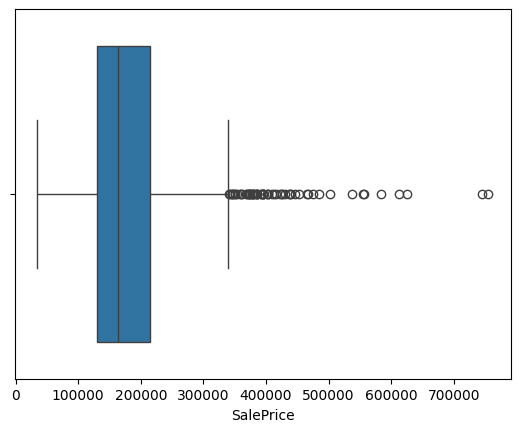

In [20]:
sns.boxplot(x = df['SalePrice'])
plt.show()

In [21]:
df.loc[(np.abs(stats.zscore(df['SalePrice'])) > 2), 'SalePrice'] = df['SalePrice'].median()

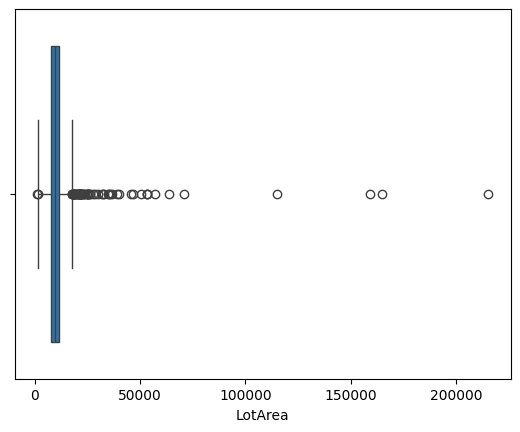

In [22]:
sns.boxplot(x = df['LotArea'])
plt.show()

In [23]:
df.loc[(np.abs(stats.zscore(df['LotArea'])) > 1), 'LotArea'] = df['LotArea'].median()

C:\Users\jileo\AppData\Local\Temp\ipykernel_2716\747847074.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9478.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(np.abs(stats.zscore(df['LotArea'])) > 1), 'LotArea'] = df['LotArea'].median()


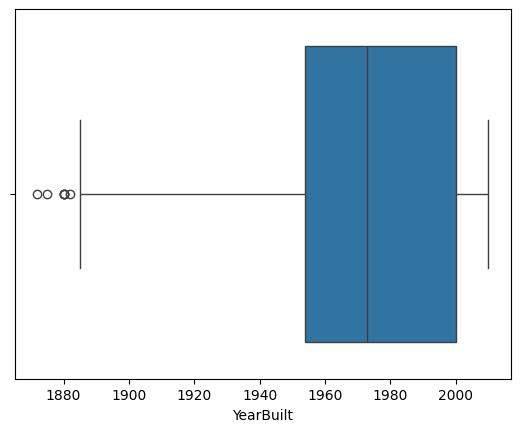

In [24]:
sns.boxplot(x = df['YearBuilt'])
plt.show()

In [25]:
df.loc[(np.abs(stats.zscore(df['YearBuilt'])) > 3), 'YearBuilt'] = df['YearBuilt'].mode()[0]

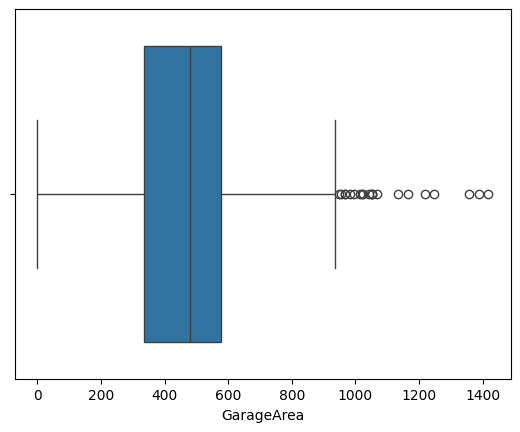

In [26]:
sns.boxplot(x = df['GarageArea'])
plt.show()

In [27]:
df.loc[(np.abs(stats.zscore(df['GarageArea'])) > 2.75), 'GarageArea'] = df['GarageArea'].median()

In [28]:
scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
label_encoder = LabelEncoder()

In [29]:
df['SalePrice_Scaled'] = scaler.fit_transform(df[['SalePrice']])
df['SalePrice_Normalized'] = min_max_scaler.fit_transform(df[['SalePrice']])
df['SalePrice_Log'] = np.log(df['SalePrice'])

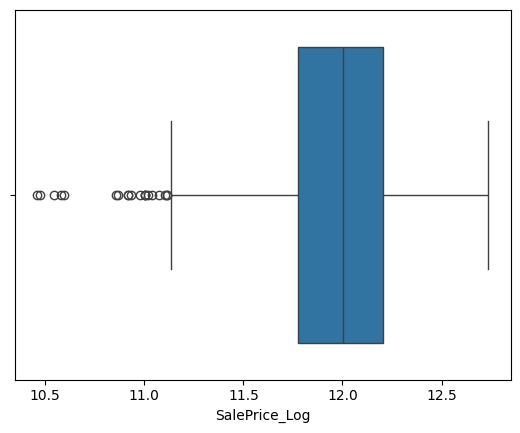

In [30]:
sns.boxplot(x = df['SalePrice_Log'])
plt.show()

In [31]:
df['LotArea_Scaled'] = scaler.fit_transform(df[['LotArea']])
df['LotArea_Normalized'] = min_max_scaler.fit_transform(df[['LotArea']])
df['LotArea_Log'] = np.log(df['LotArea'])

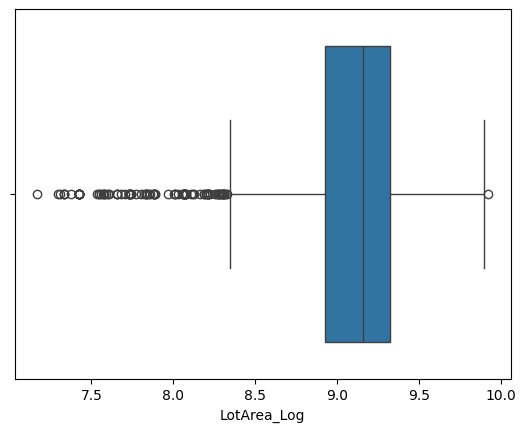

In [32]:
sns.boxplot(x = df['LotArea_Log'])
plt.show()

In [33]:
df['YearBuilt_Scaled'] = scaler.fit_transform(df[['YearBuilt']])
df['YearBuilt_Normalized'] = min_max_scaler.fit_transform(df[['YearBuilt']])

In [34]:
df['GarageArea_Scaled'] = scaler.fit_transform(df[['GarageArea']])
df['GarageArea_Normalized'] = min_max_scaler.fit_transform(df[['GarageArea']])
df['GarageArea_Log'] = np.log(df['GarageArea'])

c:\laragon\bin\python\python-3.10\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


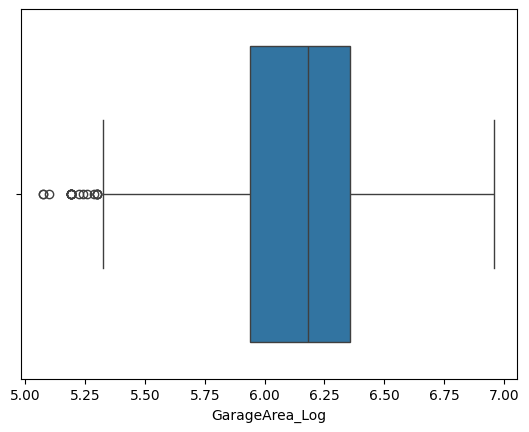

In [35]:
sns.boxplot(x = df['GarageArea_Log'])
plt.show()

In [36]:
df['OverallState'] = (df['OverallQual'] + df['OverallCond']) / 2
df['ExterState'] = (df['ExterQual'] + df['ExterCond']) / 2

In [37]:
df['BsmtState'] = (df['BsmtQual'] + df['BsmtCond'] + df['BsmtExposure'] + df['BsmtFinSF1'] + df['BsmtFinSF2']) / 5

In [38]:
df['YearsSinceRenovation'] = 2024 - df['YearRemodAdd']

In [39]:
category_columns = df.select_dtypes(object).columns

In [40]:
for i in category_columns:
    df[i] = label_encoder.fit_transform(df[i])

In [41]:
df.to_csv('output.csv')